In [1]:
import warnings
warnings.filterwarnings("ignore")

import read_data as imp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.covariance import LedoitWolf
import pyfolio

from pypfoptShorts.efficient_frontier import EfficientFrontier
from pypfoptShorts import risk_models
from pypfoptShorts import expected_returns

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
def find_median(x):
    aux = [0 for k in range(x.shape[0])]
    for i in range(x.shape[0]):
        for j in range(x.shape[0]):
            aux[i] += np.linalg.norm(x.iloc[i,]-x.iloc[j,])
    return x.iloc[aux == min(aux),].iloc[0,]

In [3]:
base = 252

symbols = pd.read_csv('Nemos.csv')['Nemo'].tolist()
years = [x for x in range(2016,2019)]
hist_data = imp.organizarTodo(symbols,years)

Daily_Assets = pd.DataFrame()
for asset,df in hist_data.items():
    Daily_Assets[asset] = df['Close']
    
Daily_Log_Assets = Daily_Assets.pct_change()

In [4]:
Initial_Date = pd.to_datetime('2017-01-01')

Rebalancing_dates = [Initial_Date]
curr_month = Initial_Date.month

the_start = np.where(Initial_Date <= Daily_Assets.index)[0].tolist()[0]

for i in range((the_start+1), len(Daily_Assets.index)):
    if Daily_Assets.index[i].month != curr_month:
        Rebalancing_dates.append(Daily_Assets.index[i-1])
        curr_month = Daily_Assets.index[i].month

com = 0.0015
BidAskSpread = 0.00016

Memory = 252

# Clasico

In [5]:
retorno = np.arange(0.01,0.5,0.01)

Resultados = pd.DataFrame()

Resultados['Retorno'] = retorno

for j in Rebalancing_dates:
    M = retorno.copy()
    R = retorno.copy()
        
    end = np.where(j <= Daily_Assets.index)[0].tolist()[0]
    ini = end - Memory

    dfaux = Daily_Assets.iloc[ini:end,:].pct_change().dropna(how="all").copy()

    # Classic
    mu = base * dfaux.median()
    LW_Cov = LedoitWolf().fit(dfaux).covariance_
    S = base * LW_Cov

    for i in range(len(retorno)):
        ef = EfficientFrontier(mu, S, weight_bounds=(-1, 1))
        ef.efficient_return(target_return=retorno[i])
        M[i] = ef.portfolio_performance()[0]
        R[i] = ef.portfolio_performance()[1]
        
    Resultados[str(j)] = R

In [6]:
Resultados.to_excel('Curvas Long Short Robusta Marginal.xlsx')

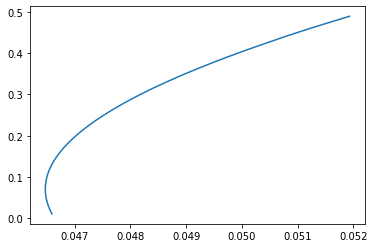

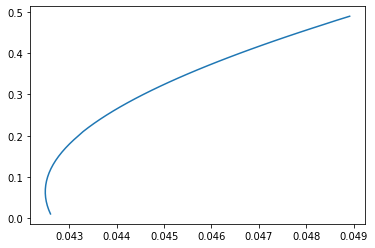

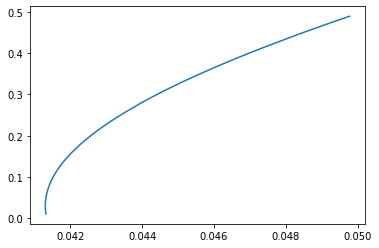

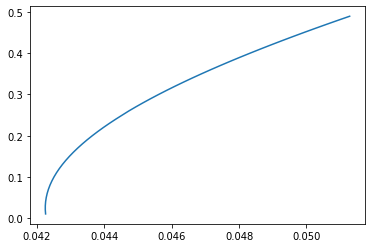

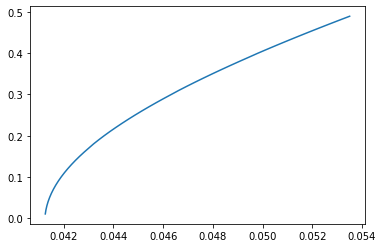

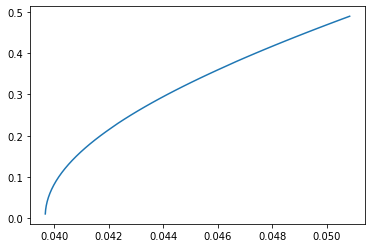

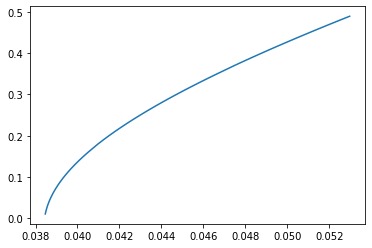

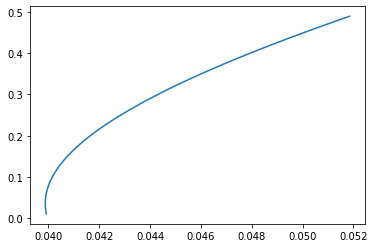

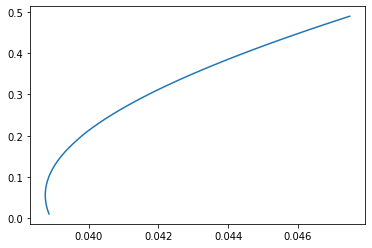

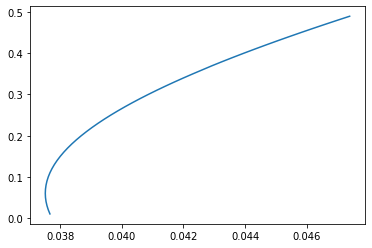

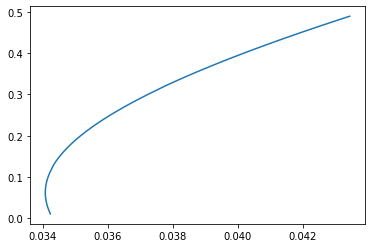

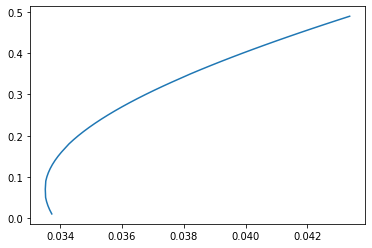

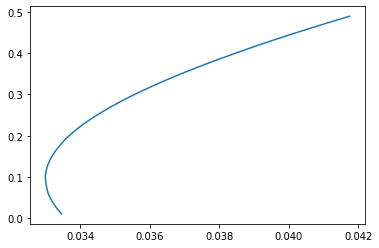

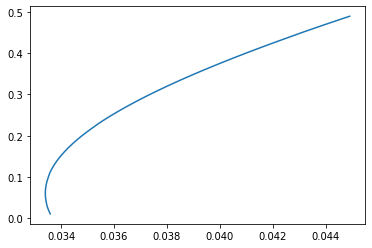

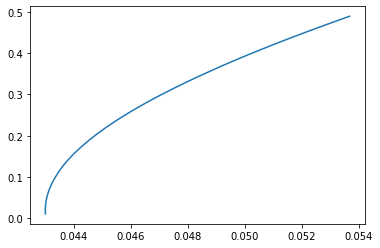

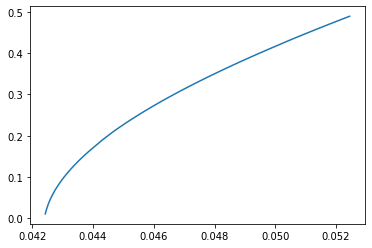

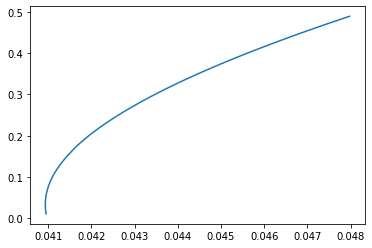

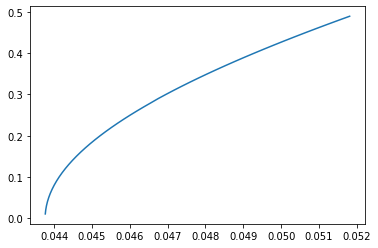

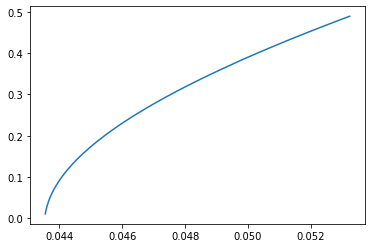

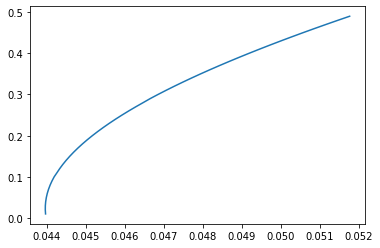

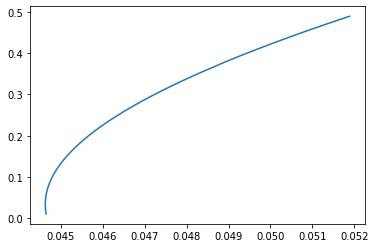

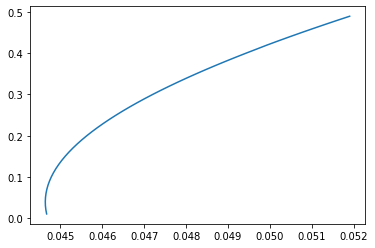

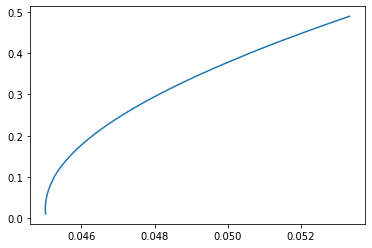

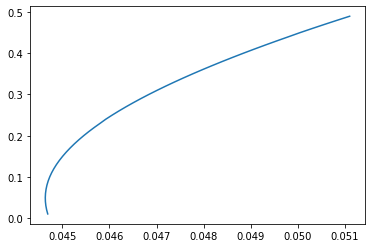

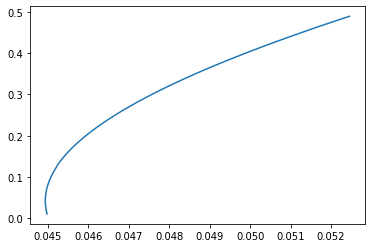

In [7]:
for i in range(1,Resultados.shape[1]):
    plt.figure()
    plt.plot(Resultados.iloc[:,i], Resultados.iloc[:,0])
    plt.show()

# Contaminados

In [8]:
Contaminados = pd.read_excel('Contaminados.xlsx')
Contaminados = Contaminados.set_index('Date')
Contaminados   

,A,AAPL,ABBV,ABC,ABMD,ABT,ADBE,ADI,ADM,ADP,...,WY,WYNN,XLE,XLNX,XLU,XOM,XRAY,XRX,ZBH,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,-0.026788,0.000855,-0.027515,-0.017742,-0.055826,-0.044088,-0.020971,-0.015907,-0.022901,-0.031280,...,-0.005003,-0.006070,-0.000332,-0.024910,-0.002079,-0.006286,-0.032703,-0.031044,-0.007603,-0.021612
2016-01-05,-0.003441,-0.025059,-0.004166,0.014626,-0.002816,-0.000233,0.004023,-0.007348,0.011161,0.002437,...,0.002347,0.018904,0.003814,0.014847,0.007178,0.008521,0.020387,-0.001942,0.020823,-0.010857
2016-01-06,0.004439,-0.019570,0.000174,-0.015286,0.337765,-0.008388,-0.014295,-0.042561,-0.024283,-0.012277,...,-0.022074,-0.051805,-0.038493,-0.018287,-0.001839,-0.251702,-0.014486,-0.012646,0.004330,-0.029145
2016-01-07,-0.042475,-0.042205,-0.002963,-0.031932,-0.039625,0.485119,-0.020984,-0.025512,-0.023756,-0.030519,...,-0.036936,-0.094070,-0.024399,-0.039448,-0.006679,-0.016006,-0.008785,-0.027587,-0.022993,-0.030019
2016-01-08,-0.010513,0.005288,-0.027268,-0.005785,0.032471,-0.020944,-0.014140,-0.008727,-0.003766,-0.008251,...,-0.009233,-0.040704,-0.012857,-0.020534,-0.000464,-0.020202,-0.028635,-0.028369,-0.004217,-0.011254
2016-01-11,-0.016844,0.016192,-0.031806,-0.039812,0.004966,0.001475,0.017416,0.023810,-0.006688,0.004864,...,-0.010394,-0.016453,-0.021409,0.004426,0.005335,-0.013389,-0.019477,-0.019809,-0.017233,-0.019919
2016-01-12,0.006589,0.014513,0.017817,0.001276,0.039059,0.017923,0.004923,0.009380,0.003220,0.012228,...,-0.021369,-0.020602,0.002370,0.005566,-0.003922,0.020491,0.010916,0.013830,0.030762,-0.004148
2016-01-13,-0.034826,-0.025710,-0.066740,-0.011043,-0.028419,-0.028461,-0.016923,-0.030010,-0.023344,-0.026803,...,-0.009993,-0.056634,-0.024009,-0.033441,-0.000463,0.005984,-0.017171,-0.032532,-0.016234,-0.046647
2016-01-14,0.020347,0.021871,0.066041,0.006227,0.024123,0.020357,0.016988,0.007984,-0.003287,1.234177,...,-0.012710,-0.018487,0.043049,0.011930,0.015064,0.045869,0.016931,-0.004335,0.014822,0.004369


In [9]:
retorno = np.arange(0.01,0.5,0.01)

ResultadosC = pd.DataFrame()

ResultadosC['Retorno'] = retorno

for j in Rebalancing_dates:
    M = retorno.copy()
    R = retorno.copy()
        
    end = np.where(j <= Contaminados.index)[0].tolist()[0]
    ini = end - Memory

    dfaux = Contaminados.iloc[ini:end,:].copy()

    # Classic
    mu = base * dfaux.median()
    LW_Cov = LedoitWolf().fit(dfaux).covariance_
    S = base * LW_Cov

    for i in range(len(retorno)):
        ef = EfficientFrontier(mu, S, weight_bounds=(-1, 1))
        ef.efficient_return(target_return=retorno[i])
        M[i] = ef.portfolio_performance()[0]
        R[i] = ef.portfolio_performance()[1]
        
    ResultadosC[str(j)] = R

In [10]:
ResultadosC.to_excel('Curvas Mediana Marginal Long Short Contaminadas.xlsx')

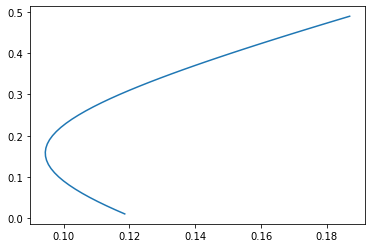

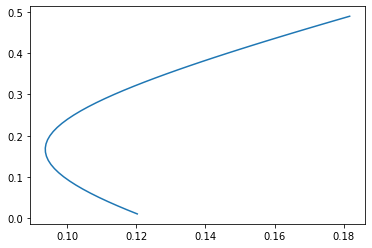

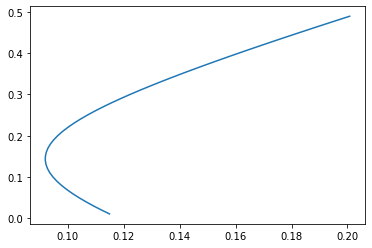

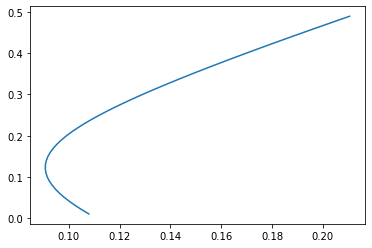

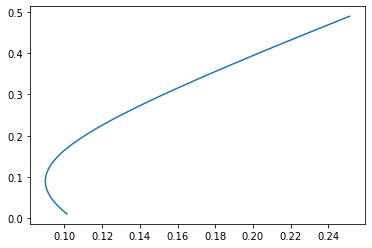

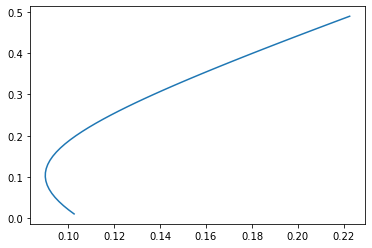

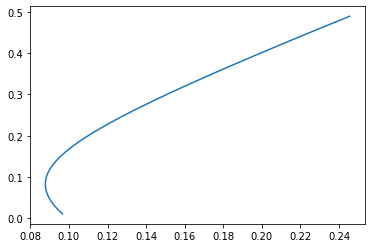

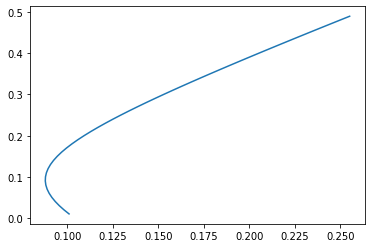

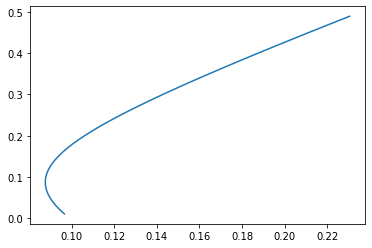

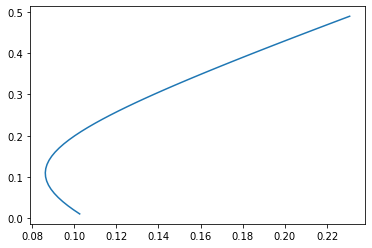

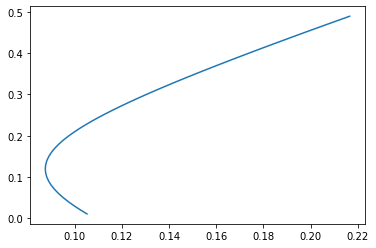

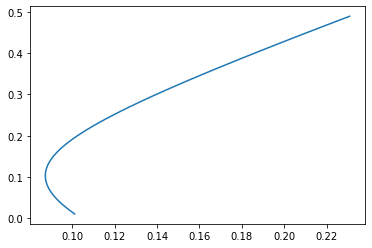

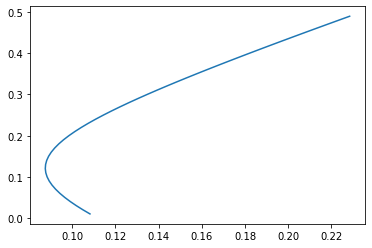

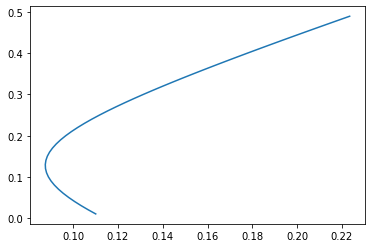

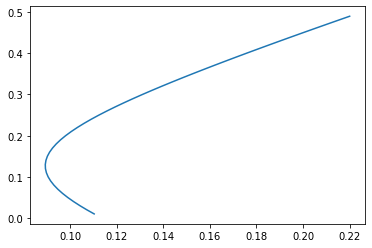

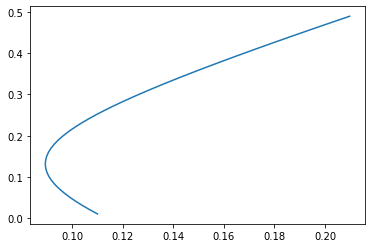

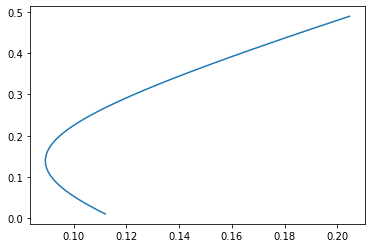

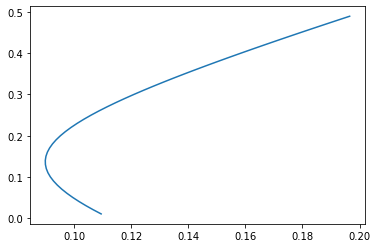

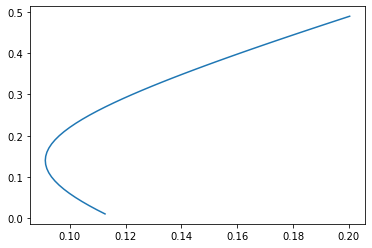

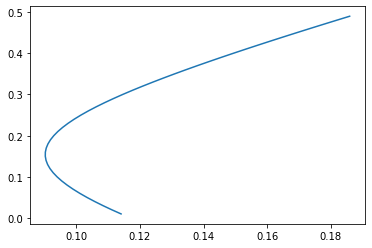

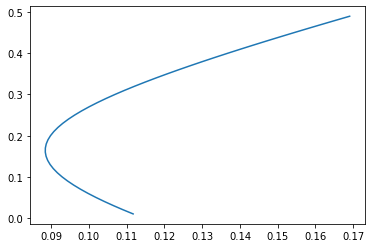

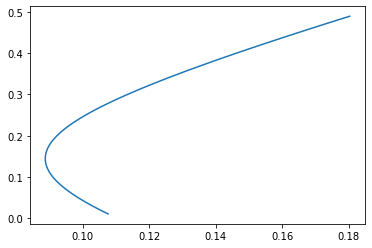

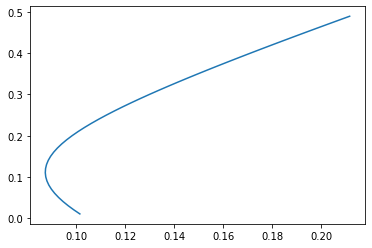

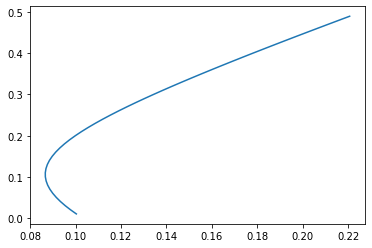

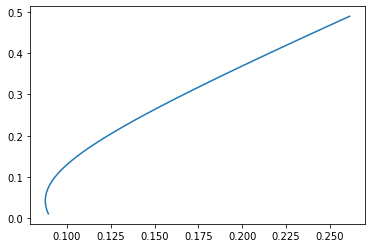

In [11]:
for i in range(1,ResultadosC.shape[1]):
    plt.figure()
    plt.plot(ResultadosC.iloc[:,i], ResultadosC.iloc[:,0])
    plt.show()